# Travel Insurance Project


## Context
A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.\
**The New Insurance Package Also Includes Covid Cover** (hereinafter called: "**COVID Insurance**" for short).\
The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.\
The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.

## Content
Age - Age Of The Customer\
Employment Type - The Sector In Which Customer Is Employed\
GraduateOrNot - Whether The Customer Is College Graduate Or Not\
AnnualIncome - The Yearly Income Of The Customer In Indian Rupees [Rounded To Nearest 50 Thousand Rupees]\
FamilyMembers - Number Of Members In Customer's Family\
ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.\
FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On At least 4 Different Instances In The Last 2 Years [2017-2019].\
EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country [Not Necessarily Using The Company's Services]\
TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## GOAL: Building An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package.

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Exploratory Data Analysis (EDA)

### Dataset overview
Sample of Travel Insurance dataset

In [3]:
trav_ins_df = pd.read_csv("TravelInsurancePrediction.csv", index_col=0)
trav_ins_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


- highlighting a fact that AnnualIncome is rounded to 50 thousand Rupees

In [4]:
trav_ins_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 155.2+ KB


- No null values in the dataset
- All feature have proper data type: int for numerical, object for categorical (string)
- Feature GraduateOrNot, FrequentFlyer, EverTravelledAbroad might be transformed from YES/ NO categorical feature on 0 / 1 feature
- Dataset contains travel insurance data from 1987 customers

### Checking for duplicated rows

In [5]:
trav_ins_df.duplicated().sum()

738

- With a view on the sample of Travel Insurance dataset (above) and its features, theres is high probability that different customers brought same data, therefor all raws will remain. Is is mainly because most of features are binary and also AnnualIncome elements are rounded to whole thousands

### Checking number of categories in categorical features

In [6]:
for column in [
    "Employment Type",
    "GraduateOrNot",
    "ChronicDiseases",
    "FrequentFlyer",
    "EverTravelledAbroad",
    "TravelInsurance",
]:
    print(f"Unique elements in {column}:", trav_ins_df[column].unique())

Unique elements in Employment Type: ['Government Sector' 'Private Sector/Self Employed']
Unique elements in GraduateOrNot: ['Yes' 'No']
Unique elements in ChronicDiseases: [1 0]
Unique elements in FrequentFlyer: ['No' 'Yes']
Unique elements in EverTravelledAbroad: ['No' 'Yes']
Unique elements in TravelInsurance: [0 1]


- All Categorical features are binary
- It would be convenient to transform all feature on 0/1 categories as eg. ChronicDiseases

### Feature Transformation
Transforming YES on 1 and NO on 0 in categorical features (GraduateOrNot, FrequentFlyer, EverTravelledAbroad).
Renaming GraduateOrNot on Graduation 

In [7]:
trav_ins_df["GraduateOrNot"] = trav_ins_df["GraduateOrNot"].replace(
    {"No": 0, "Yes": 1}
)
trav_ins_df.rename(columns={"GraduateOrNot": "Graduation"}, inplace=True)

trav_ins_df["EverTravelledAbroad"] = trav_ins_df[
    "EverTravelledAbroad"
].replace({"No": 0, "Yes": 1})
trav_ins_df["FrequentFlyer"] = trav_ins_df["FrequentFlyer"].replace(
    {"No": 0, "Yes": 1}
)

C:\Users\janek\AppData\Local\Temp\ipykernel_11308\616073792.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trav_ins_df["GraduateOrNot"] = trav_ins_df["GraduateOrNot"].replace(
C:\Users\janek\AppData\Local\Temp\ipykernel_11308\616073792.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ].replace({"No": 0, "Yes": 1})
C:\Users\janek\AppData\Local\Temp\ipykernel_11308\616073792.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly cal

Additionally, transforming column name "Employment Type" on "GovernmentWorker" along with its elements:\
'Government Sector' on 1\
'Private Sector/Self Employed' on 0

In [8]:
trav_ins_df["Employment Type"] = trav_ins_df["Employment Type"].replace(
    {"Private Sector/Self Employed": 0, "Government Sector": 1}
)
trav_ins_df.rename(
    columns={"Employment Type": "GovernmentWorker"}, inplace=True
)

C:\Users\janek\AppData\Local\Temp\ipykernel_11308\3812352432.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trav_ins_df["Employment Type"] = trav_ins_df["Employment Type"].replace(


Below sample of dataset after transformation

In [9]:
trav_ins_df.head(3)

,Age,GovernmentWorker,Graduation,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,1,1,400000,6,1,0,0,0
1,31,0,1,1250000,7,0,0,0,0
2,34,0,1,500000,4,1,0,0,1


- Now all categorical (binary) features are encoded identically

### Separating columns on groups
Assigning numerical columns, categorical columns and target independently for future analysis

In [10]:
num_col = ["Age", "AnnualIncome", "FamilyMembers"]
cat_col = [
    "Graduation",
    "FrequentFlyer",
    "EverTravelledAbroad",
    "ChronicDiseases",
    "GovernmentWorker",
]
target = ["TravelInsurance"]

### Basic statistics below:
Numerical features

In [11]:
trav_ins_df[["Age", "AnnualIncome", "FamilyMembers"]].describe()

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


- Since median family member in Indie is around 4-6, FamilyMembers median as 5 is realistic and allows us to judge that the sample of customers was picked randomly.
- The range of customer age is quite narrow with minimal age of 25 and maximum of 35. This points out some problems in data capture for example importing data only from customers using mobile app. It might be also the intentional procedure. Nevertheless, the further analysis and ML models will be limited to this age group.
- The annual income is in Indian Rupees which indicates that sample is from Indian population. The mean average annual incomes is quite high compared to population data which points out that customers are wealthy compared to regular Indian citizen.

### Sample distributions of numerical features
#### Boxplots of continues features

Visualizing the distribution of elements for each feature and identifying outliers, which aids in assessing data quality and determining whether certain elements should be excluded.

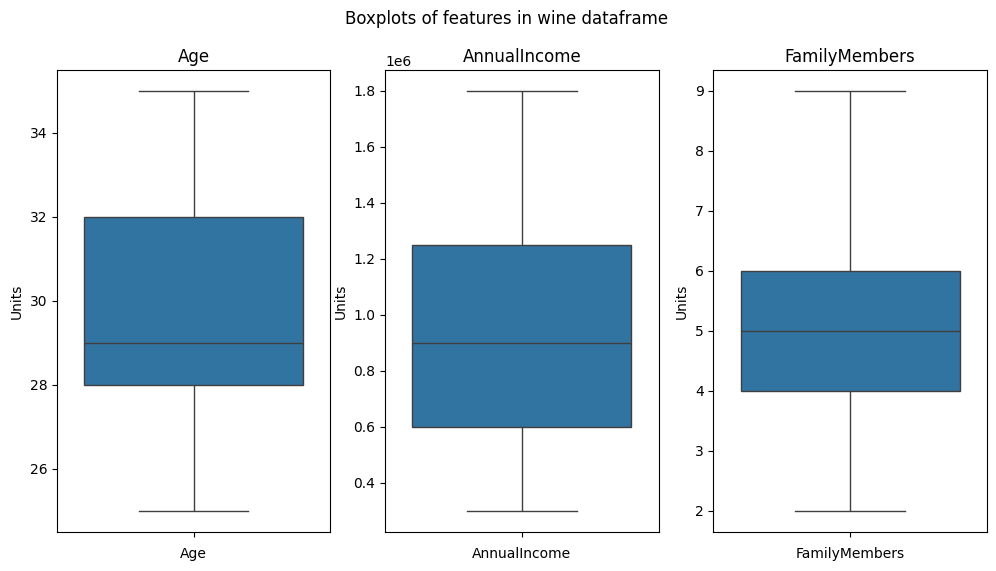

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes = axes.flatten()
fig.suptitle("Boxplots of features in wine dataframe")
for i, column in enumerate(num_col):
    sns.boxplot(trav_ins_df[column], ax=axes[i])
    axes[i].set_title(f"{column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Units")

- no outliers in the dataset. It may imply that some data processing had been done before.

#### Histograms of continues features
Histograms help identify data patterns and assess the distribution of elements across all numerical features in the dataset. Additionally proportion of customers who bought COVID Travel Insurance is highlighted.

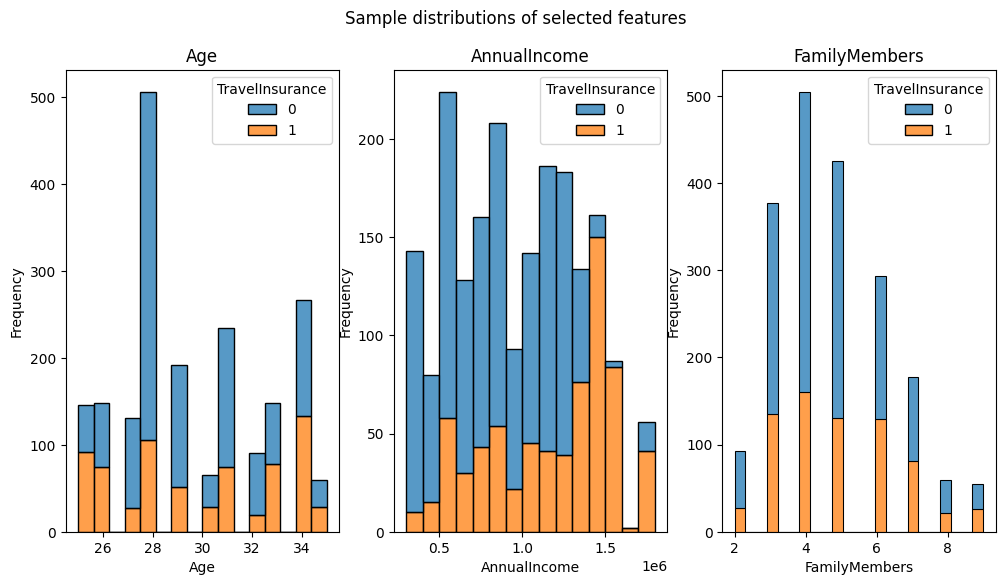

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes = axes.flatten()
fig.suptitle("Sample distributions of selected features")
for i, column in enumerate(num_col):
    sns.histplot(
        data=trav_ins_df,
        x=column,
        ax=axes[i],
        hue="TravelInsurance",
        multiple="stack",
    )

    axes[i].set_title(f"{column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Frequency")

- Features AnnualIncome and FamilyMembers are approximately normally distributed.
- Age feature histogram might be an evidence of non-random data capture.
- The proportion of customers who bought COVID travel insurance increase directly proportional with Annual Income

### Comparing categorical features

#### Barplots with COVID Insurance distinction

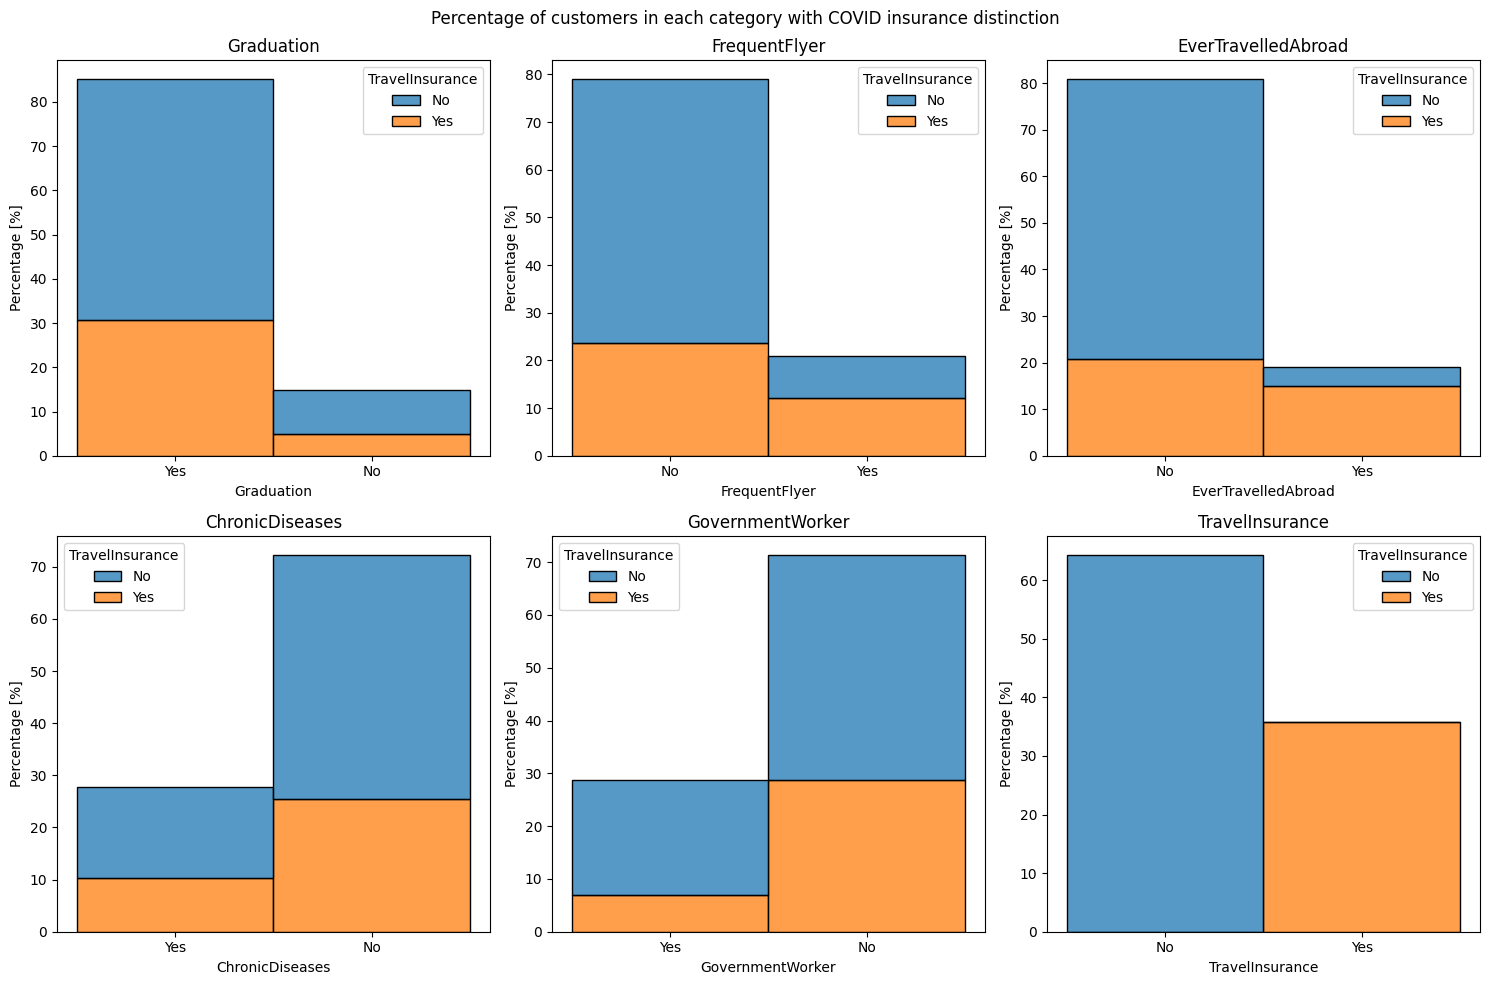

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
fig.suptitle(
    "Percentage of customers in each category with COVID insurance distinction"
)

for i, column in enumerate(cat_col + target):
    sns.histplot(
        data=trav_ins_df.replace({0: "No", 1: "Yes"}),
        x=column,
        ax=axes[i],
        hue="TravelInsurance",
        multiple="stack",
        stat="percent",
        discrete=True,
    )
    axes[i].set_ylabel("Percentage [%]")
    axes[i].set_title(f"{column}")

plt.tight_layout()
plt.show()

- Customers in each category are highly imbalanced
- In data set, the MAJORITY of customers are indian, graduated, non-government workers without any chronic diseases, who in years 2017-2019 traveled by plane less than 4 times and have never been abroad 
- Data captured consists of around 35% customers who successfully bought the COVID Insurance

#### Barplots comparing percentage of COVID Insurance takers

Normalizing and modifying upper plots by giving percentage of customers in each subcategory who bough COVID Insurance (TravelInsurance = 1). This way we can say which subcategory (Yes or No) of which feature bring the biggest impact on COVID Insurance sales.

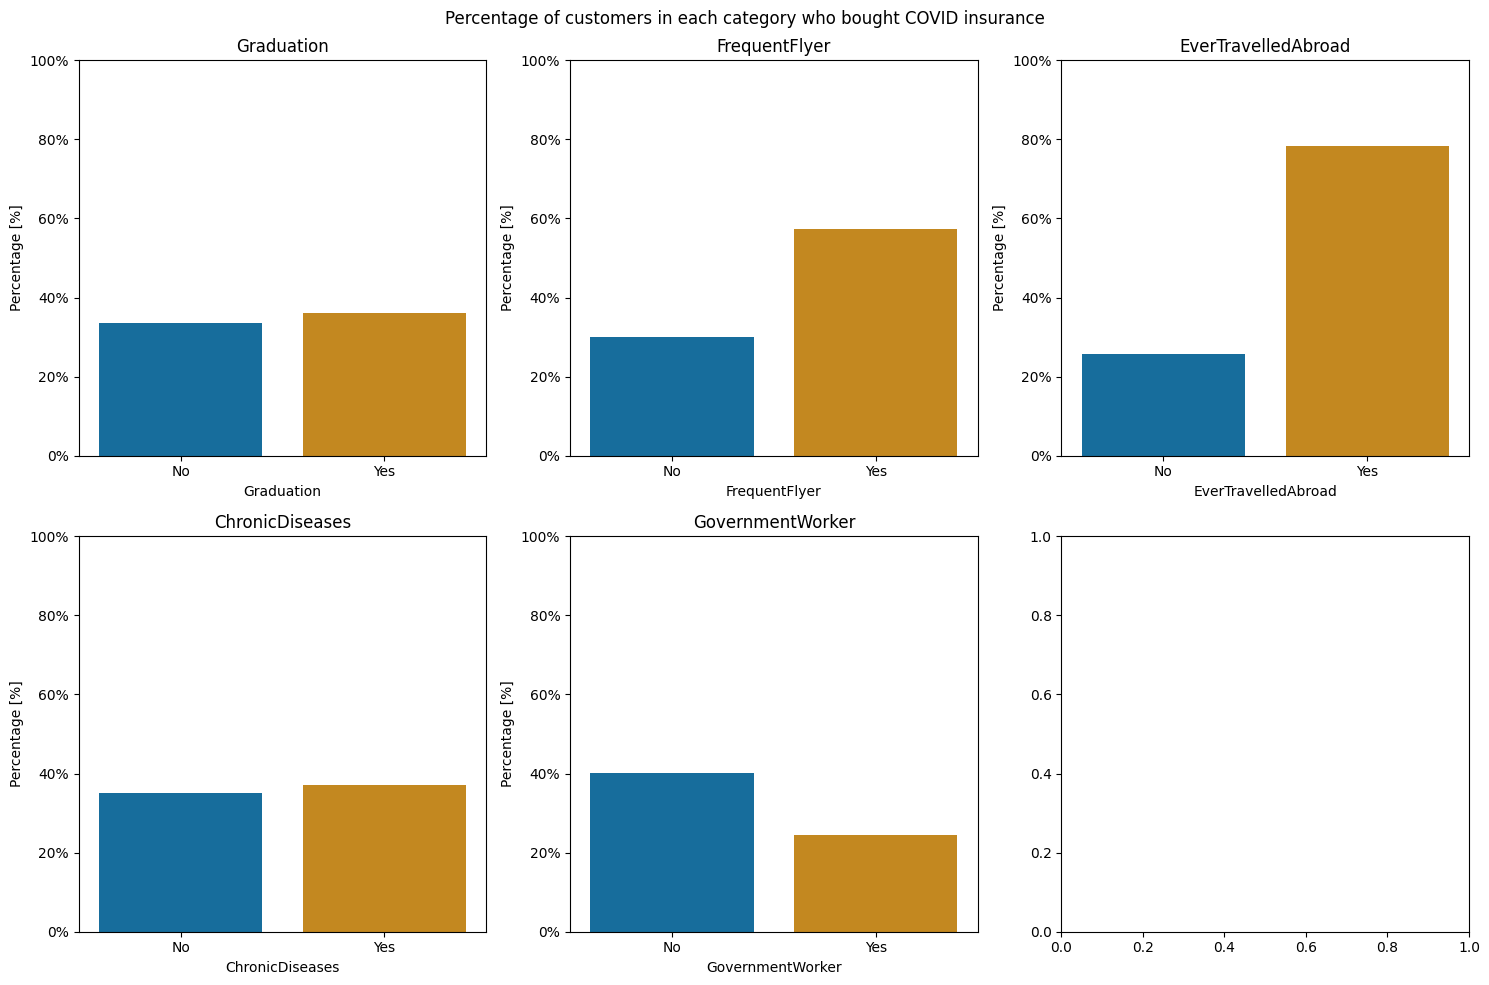

In [46]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
fig.suptitle(
    "Percentage of customers in each category who bought COVID insurance"
)
trav_ins_df_yn = trav_ins_df.replace({0: "No", 1: "Yes"})

for i, column in enumerate(cat_col):
    sns.barplot(
        data=trav_ins_df.groupby(column)["TravelInsurance"]
        .mean()
        .reset_index(),
        x=column,
        y="TravelInsurance",
        ax=axes[i],
        hue=column,
        dodge=False,
        palette="colorblind",
        legend=False
    )
    axes[i].set_ylabel("Percentage [%]")
    axes[i].set_title(f"{column}")
    axes[i].set_ylim(0, 1)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(["No", "Yes"])
    axes[i].yaxis.set_major_formatter(
        plt.FuncFormatter(lambda x, _: f"{int(x * 100)}%")
    )

plt.tight_layout()
plt.show()

- Frequent Flyers and customers traveled abroad in the past have the biggest percentage of COVID Insurance takers among their category
- In opposite, Government workers were less likely to boy the insurance.
- The rest of categories probably do not imply whether customer would buy or not the insurance

#### Statistics for proportion of customers with COVID Insurance
Creating a function to conduct proportion z_test to check the significance of difference in proportion:

$\frac {\large{\text{Insurance takers in subcategory}}}{\large{\text{All customers in subcategory}}}$

between subcategories* for each feature.\
For each categorical feature hypothesis will be checked:

$H_0$: There is no significant difference in proportion COVID Insurance Takers and Non-Takers

and

$H_a$: There is significant difference in proportion COVID Insurance Takers and Non-Takers\
$\alpha$ = 0.05

*subcategory = eg. customers who are not Government workers (GovernmentWorkers = 0)

Assumptions for Z-test for proportions:
- sampling distribution of proportions follows a normal distribution under the Central Limit Theorem (CLT).
- $ n \cdot p \geq 5 \quad \text{and} \quad n \cdot (1 - p) \geq 5$\
($n$ is the sample size $p$ is the proportion of success (e.g., customers interested in buying insurance))

All requirements were meet

In [16]:
from statsmodels.stats.proportion import proportions_ztest


def z_stat(feature, df):
    print(f"Performing z-test for {feature}")
    count_graduation_0 = df[df[feature] == 0]["TravelInsurance"].sum()
    nobs_graduation_0 = df[df[feature] == 0].shape[0]

    count_graduation_1 = df[df[feature] == 1]["TravelInsurance"].sum()
    nobs_graduation_1 = df[df[feature] == 1].shape[0]

    count = [count_graduation_0, count_graduation_1]
    nobs = [nobs_graduation_0, nobs_graduation_1]

    stat, pval = proportions_ztest(count, nobs)

    print(f"z-statistic: {stat:.4f}")
    print(f"p-value: {pval:.4f}")

    alpha = 0.05
    if pval < alpha:
        print(
            "Reject the null hypothesis: There is a significant difference between the two proportions."
        )
    else:
        print(
            "Fail to reject the null hypothesis: There is no significant difference between the two proportions.\n"
        )

##### Graduation

In [17]:
z_stat("Graduation", trav_ins_df)
pd.crosstab(
    trav_ins_df.TravelInsurance, trav_ins_df.Graduation
).style.background_gradient(cmap="summer_r")

Performing z-test for Graduation
z-statistic: -0.8440
p-value: 0.3987
Fail to reject the null hypothesis: There is no significant difference between the two proportions.



Graduation,0,1
TravelInsurance,,
0,196,1081
1,99,611


##### FrequentFlyer

In [18]:
z_stat("FrequentFlyer", trav_ins_df)
pd.crosstab(
    trav_ins_df.TravelInsurance, trav_ins_df.FrequentFlyer
).style.background_gradient(cmap="summer_r")

Performing z-test for FrequentFlyer
z-statistic: -10.3462
p-value: 0.0000
Reject the null hypothesis: There is a significant difference between the two proportions.


FrequentFlyer,0,1
TravelInsurance,,
0,1099,178
1,471,239


##### EverTravelledAbroad

In [19]:
z_stat("EverTravelledAbroad", trav_ins_df)
pd.crosstab(
    trav_ins_df.TravelInsurance, trav_ins_df.EverTravelledAbroad
).style.background_gradient(cmap="summer_r")

Performing z-test for EverTravelledAbroad
z-statistic: -19.3095
p-value: 0.0000
Reject the null hypothesis: There is a significant difference between the two proportions.


EverTravelledAbroad,0,1
TravelInsurance,,
0,1195,82
1,412,298


##### ChronicDiseases

In [20]:
z_stat("ChronicDiseases", trav_ins_df)
pd.crosstab(
    trav_ins_df.TravelInsurance, trav_ins_df.ChronicDiseases
).style.background_gradient(cmap="summer_r")

Performing z-test for ChronicDiseases
z-statistic: -0.8108
p-value: 0.4175
Fail to reject the null hypothesis: There is no significant difference between the two proportions.



ChronicDiseases,0,1
TravelInsurance,,
0,930,347
1,505,205


##### GovernmentWorker

In [21]:
z_stat("GovernmentWorker", trav_ins_df)
pd.crosstab(
    trav_ins_df.TravelInsurance, trav_ins_df.GovernmentWorker
).style.background_gradient(cmap="summer_r")

Performing z-test for GovernmentWorker
z-statistic: 6.5904
p-value: 0.0000
Reject the null hypothesis: There is a significant difference between the two proportions.


GovernmentWorker,0,1
TravelInsurance,,
0,847,430
1,570,140


- The $H_0$ rejected in: 
    - FrequentFlyer, 
    - EverTravelledAbroad, 
    - GovernmentWorker.
- listed features have statistically significant influence on the customers' choice: Take or not to take the COVID Insurance

### Correlation heatmap
Pearson's standard correlation coefficient in order to show the dependencies between features

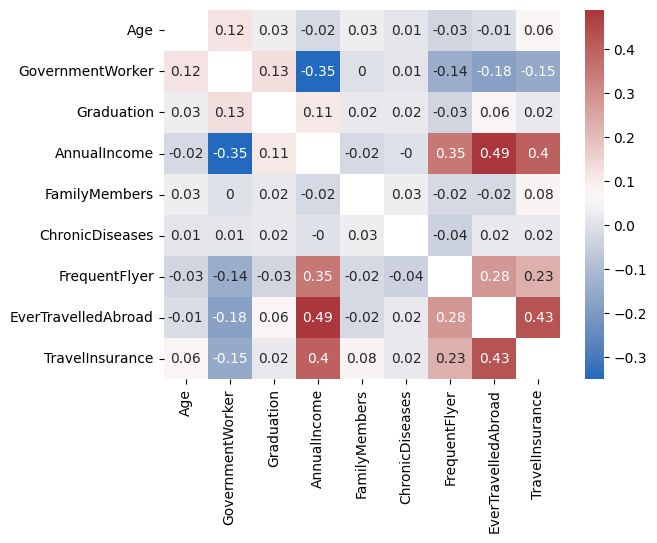

In [22]:
correlation_matrix = trav_ins_df.corr().round(2)
correlation_matrix *= 1 + np.diag(np.nan * np.ones(9))
sns.heatmap(data=correlation_matrix, annot=True, cmap="vlag");

- Focusing on TravelInsurance row (as a dependent feature), we see that some features are moderately, positively correlated with TravelInsurance. It means that some customers are more likely to buy COVID travel insurance than the others. This features are:
    - **AnnualIncome**
    - **FrequentFlyer** (customers with at least 4 Different air travels years 2017-2019)
    - **EverTravelledAbroad**\
Surprisingly  **GovernmentWorker** is negatively correlated with **TravelInsurance**  

    It means that wealthy customers, who travel frequently (also abroad) are more likely to buy a COVID travel insurance.

- Beside correlations with TravelInsurance, there is some multicollinearity - some independent variables are moderately correlated with each other Eg:
    - **AnnualIncome**  is positively correlated with **EverTravelledAbroad** and **FrequentFlyer**  (wealthy people travel more)
    - **FrequentFlyer** is positively correlated with **EverTravelledAbroad** (derives from the feature characteristic - Frequent Flyer is a customer with at least 4 Different air travels)
    - **GovernmentWorker** is negatively correlated with **AnnualIncome** (Government workers earn less then customers in private sector)

- From the above heatmap, we can see that the features are not much correlated. The highest multicollinearity correlation is between **AnnualIncome** and  **EverTravelledAbroad** i.e 0.49.
- Based on Pearson's correlation, Age, number of family members, graduation, chronic diseases do not influence on the TravelInsurance. Listed features might not be taken into account while further analysis.

## 2. Predicting Modeling

Further analysis will focus on predicting the TravelInsurance feature.
Since dataset brings classification problem:\
Will customer buy COVID Insurance? YES (1) or NO (0), various Classification machine learning models will be used:
- Linear Support Vector Machine Model,
- Radial Support Vector Machine Model,
- Logistic Regression,
- K-nearest Neighbors
- Decision Tree,
- Naive Bayes,
- Random Forest

Among them, the best will be chosen.


### Importing all the required ML packages

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
)
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

### Separating  testing from  training data (70/30)
In order to test performance of the model on new, unseen data, dataset is divided on training and testing in proportion 70/30: train data/test data

In [24]:
train, test = train_test_split(
    trav_ins_df,
    test_size=0.3,
    random_state=0,
    stratify=trav_ins_df["TravelInsurance"],
)
train_X = train[num_col + cat_col]
train_Y = train["TravelInsurance"]

test_X = test[num_col + cat_col]
test_Y = test["TravelInsurance"]

### Sample of train data frame and feature assessment

In [25]:
train_X.head(1)

,Age,AnnualIncome,FamilyMembers,Graduation,FrequentFlyer,EverTravelledAbroad,ChronicDiseases,GovernmentWorker
13,31,1500000,6,1,1,1,0,1


- Categorical features (Graduation, FrequentFlyer, EverTravelledAbroad, ChronicDiseases, GovernmentWorker) are binominal and numerical. Thanks to previous feature engineering, they could remain the same.
- Numerical features (Age, AnnualIncome, FamilyMembers) might be scaled for better models' performance

### Cross Validation (C-V)
The target feature among customers is imbalance (c.a 30% of customers bought a COVID Insurance and the rest 70% did not) so class imbalance will be handled with `class_weight="balanced"` where it was possible
#### C-V with Standard Scaler
In order to asses which classification model works the best, cross validation for all selected models will be performed

In [26]:
accuracy_model_SS = []
std_model_SS = []
mean_model_SS = []
classifiers = [
    "Linear SVM",
    "Radial SVM",
    "Logistic Regression",
    "KNN",
    "Decision Tree",
    "Naive Bayes",
    "Random Forest",
]
models = [
    svm.SVC(kernel="linear", class_weight="balanced"),
    svm.SVC(kernel="rbf", class_weight="balanced"),
    LogisticRegression(max_iter=500, class_weight="balanced"),
    KNeighborsClassifier(n_neighbors=9),
    DecisionTreeClassifier(class_weight="balanced"),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, class_weight="balanced"),
]

numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(
    [("standard_scaler", numerical_preprocessor, num_col)],
    remainder="passthrough",
)
for i in models:
    model_SS = make_pipeline(preprocessor, i)
    cv_result = cross_val_score(
        model_SS, train_X, train_Y, cv=10, scoring="accuracy"
    )
    cv_result = cv_result
    mean_model_SS.append(cv_result_model_SS.mean())
    std_model_SS.append(cv_result_model_SS.std())
    accuracy_model_SS.append(cv_result_model_SS)
model_comparison_SS_df = pd.DataFrame(
    {"CV Mean Accuracy SS": mean_model_SS, "Std": std_model_SS}, index=classifiers
)

##### The Predictive Modeling Pipeline
Pipeline of all of selected models is as such (with Random Forest as example):

In [ ]:
model_SS

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced'))])

##### C-V results with standard scaler
Results for 10-fold cross validation for all selected models:

In [28]:
model_comparison_SS_df

,CV Mean Accuracy SS,Std
Linear SVM,0.743885,0.032206
Radial SVM,0.807194,0.028921
Logistic Regression,0.728058,0.033559
KNN,0.797842,0.021450
Decision Tree,0.749640,0.023599
Naive Bayes,0.743165,0.049952
Random Forest,0.789209,0.026735


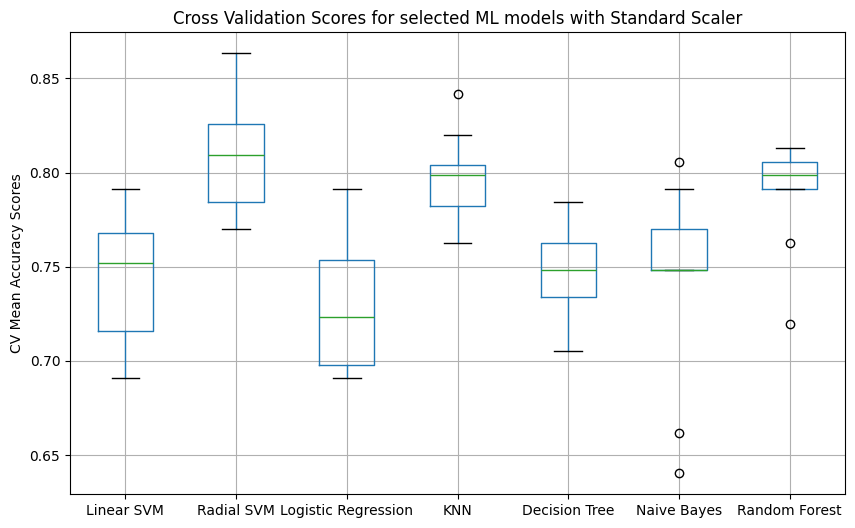

In [51]:
plt.subplots(figsize=(10, 6))
box = pd.DataFrame(accuracy_model_SS, index=[classifiers])
ax = box.T.boxplot()
ax.set_title(
    "Cross Validation Scores for selected ML models with Standard Scaler"
)
ax.set_xticklabels(
    [
        label.get_text().replace("(", "").replace(")", "").replace(",", "")
        for label in ax.get_xticklabels()
    ]
)
ax.set_ylabel("CV Mean Accuracy Scores");

- with some basic Hyperparameter we can see that Radial SVM model might predict the best
- Further Hyperparameter tuning might be help full to improve model performance

#### C-V with  MinMaxScaler

In [52]:
numerical_preprocessor = MinMaxScaler()
accuracy_model_MM = []
std_model_MM = []
mean_model_MM = []
preprocessor = ColumnTransformer(
    [("MinMaxScaler", numerical_preprocessor, num_col)],
    remainder="passthrough",
)
for i in models:
    model_MM = make_pipeline(preprocessor, i)
    cv_result_model_MM = cross_val_score(
        model_MM, train_X, train_Y, cv=10, scoring="accuracy"
    )
    cv_result2 = cv_result2
    mean_model_MM.append(cv_result_model_MM.mean())
    std_model_MM.append(cv_result_model_MM.std())
    accuracy_model_MM.append(cv_result_model_MM)
model_comparison_MM_df = pd.DataFrame(
    {"CV Mean Accuracy MM": mean_model_MM, "Std": std_model_MM}, index=classifiers
)

##### The Predictive Modeling Pipeline
Pipeline of all of selected models is as such (with Random Forest as example):

In [31]:
model_MM

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('MinMaxScaler',
                                                  MinMaxScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced'))])

##### C-V results with Min Max Scaler
Results for 10-fold cross validation for all selected models:

In [32]:
model_comparison_MM_df

,CV Mean Accuracy MM,Std
Linear SVM,0.750360,0.032819
Radial SVM,0.785612,0.030489
Logistic Regression,0.734532,0.034719
KNN,0.782734,0.029628
Decision Tree,0.751799,0.025385
Naive Bayes,0.743165,0.049952
Random Forest,0.788489,0.015827


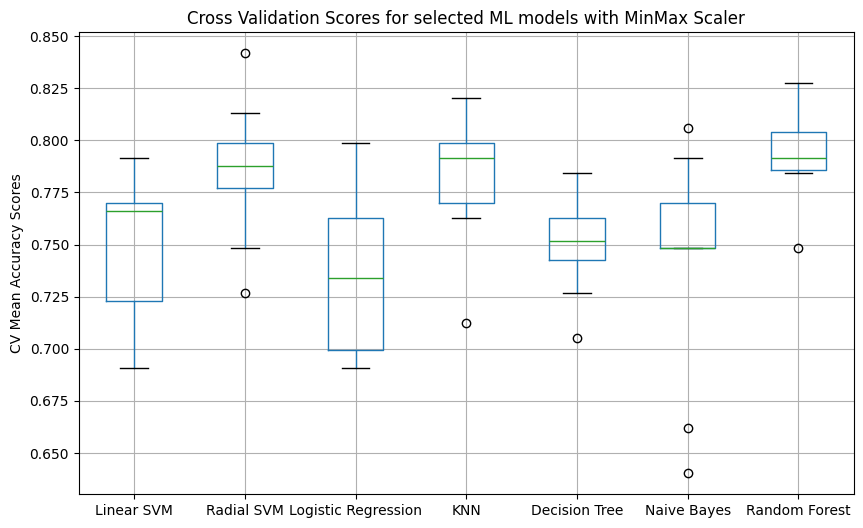

In [53]:
plt.subplots(figsize=(10, 6))
box = pd.DataFrame(accuracy_model_MM, index=[classifiers])
ax = box.T.boxplot()
ax.set_title(
    "Cross Validation Scores for selected ML models with MinMax Scaler"
)
ax.set_xticklabels(
    [
        label.get_text().replace("(", "").replace(")", "").replace(",", "")
        for label in ax.get_xticklabels()
    ]
)
ax.set_ylabel("CV Mean Accuracy Scores");

- Here, the best predictions is made by Random Forest
- Further Hyperparameter tuning might be help full to improve model performance

#### Comparison between Preprocessors 

In [34]:
preprocesspr_comparison_df = pd.DataFrame(
    {"CV Mean Accuracy SS": mean_model_SS, "CV Mean Accuracy MM": mean_model_MM},
    index=classifiers,
)
preprocesspr_comparison_df

,CV Mean Accuracy SS,CV Mean Accuracy MM
Linear SVM,0.743885,0.750360
Radial SVM,0.807194,0.785612
Logistic Regression,0.728058,0.734532
KNN,0.797842,0.782734
Decision Tree,0.749640,0.751799
Naive Bayes,0.743165,0.743165
Random Forest,0.789209,0.788489


- For most of models, Standard Scaler for numerical features preprocessing, appeared to be better.
- Only Decision Tree model predicts a little bit better with MinMax Scaler than with Standard Scaler
- Some predictions made by Naive Bayes gave accuracy very low (outliers), therefore this model will not be used

### Hyperparameter tuning
Further Hyperparameter tuning will be performed with the best models:


#### Radial Support Vector Machine Model

In [54]:
%%time
from sklearn.model_selection import GridSearchCV

numerical_preprocessor = StandardScaler()

preprocessor = ColumnTransformer(
    [("standard_scaler", numerical_preprocessor, num_col)],
    remainder="passthrough",
)

C = [0.05, 0.1, 0.2, 0.3, 0.25, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
gamma = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
kernel = ["rbf", "linear"]
hyper = {"svc__kernel": kernel, "svc__C": C, "svc__gamma": gamma}

model = make_pipeline(preprocessor, svm.SVC(class_weight="balanced"))
model_gd_svm = GridSearchCV(estimator=model, param_grid=hyper, verbose=True, cv=2)
model_gd_svm.fit(train_X, train_Y)
print(f"Best score: {round(model_gd_svm.best_score_, 4)}")
print(
    f"The best model's hyperparameters: {pd.DataFrame(model_gd_svm.best_params_, index=[0]).T}"
)

Fitting 2 folds for each of 240 candidates, totalling 480 fits
Best score: 0.7993
The best model's hyperparameters:                0
svc__C       0.9
svc__gamma   0.8
svc__kernel  rbf
CPU times: total: 29.9 s
Wall time: 31.2 s


- The optimal hyperparameters for SVC model are 
    - C: 0.9
    - gamma: 0.8
    - kernel: RBF
- This set of hyperparameters brought similar or slightly better scores as previously
- There is confirmation that Radial kernel is better than linear kernel in this dataset

#### k-nearest neighbors (KNN)

KNN does not support class weighting directly

In [36]:
%%time
n_neighbors = list(range(1, 31))
p = [1, 2]
hyper = {
    "kneighborsclassifier__n_neighbors": n_neighbors,
    "kneighborsclassifier__p": p,
}

model_knn = make_pipeline(preprocessor, KNeighborsClassifier(weights='distance'))
model_gd_knn = GridSearchCV(
    estimator=model_knn, param_grid=hyper, verbose=True, cv=2
)
model_gd_knn.fit(train_X, train_Y)
print(f"Best score: {round(model_gd_knn.best_score_, 4)}")
print(
    f"The best model's hyperparameters: {pd.DataFrame(model_gd_knn.best_params_, index=[0]).T}"
)

Fitting 2 folds for each of 60 candidates, totalling 120 fits
Best score: 0.8014
The best model's hyperparameters:                                     0
kneighborsclassifier__n_neighbors  30
kneighborsclassifier__p             1
CPU times: total: 2.7 s
Wall time: 2.94 s


- The optimal hyperparameters for KNN model are 
    - n_neighbors: 30
    - p: 1
- The models score is slightly better than last time

#### Random Forests

In [37]:
%%time
n_estimators = range(100, 1000, 100)

hyper = {"randomforestclassifier__n_estimators": n_estimators}

model_rf = make_pipeline(preprocessor, RandomForestClassifier(class_weight="balanced"))

model_gd_rf = GridSearchCV(
    estimator=model_rf, param_grid=hyper, verbose=True, cv=2
)
model_gd_rf.fit(train_X, train_Y)
print(f"Best score: {round(model_gd_rf.best_score_, 4)}")
print(
    f"The best model's hyperparameters: {pd.DataFrame(model_gd_rf.best_params_, index=[0]).T}"
)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
Best score: 0.7957
The best model's hyperparameters:                                         0
randomforestclassifier__n_estimators  700
CPU times: total: 21 s
Wall time: 22.2 s


- The optimal hyperparameters for Random Forest is:
    - n_estimators: 300
- This set of hyperparameters brought similar or slightly better scores as previously

- The best score gave KNN model. It was also the fastest model.

#### Feature Importance for Selected models

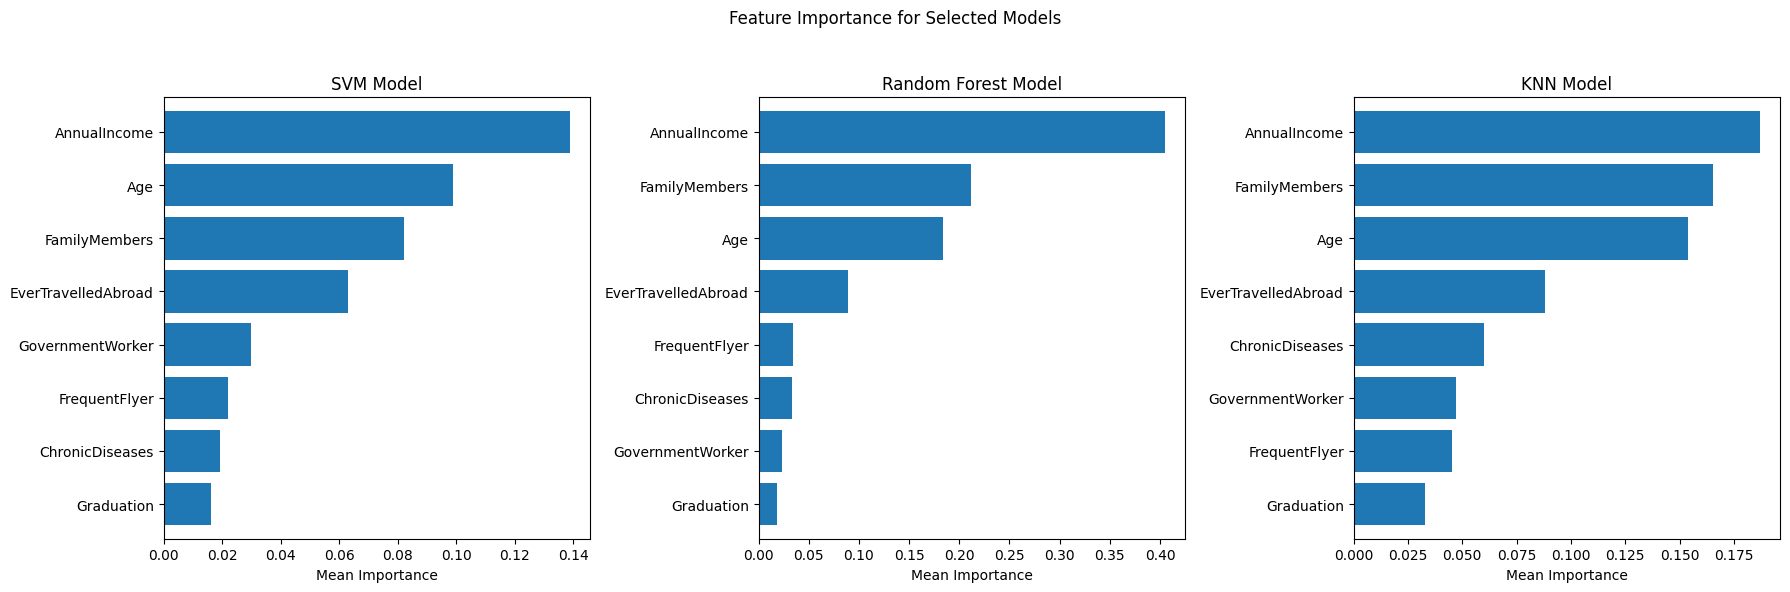

In [38]:
from sklearn.inspection import permutation_importance

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Feature Importance for Selected Models")

result_svm = permutation_importance(
    model_gd_svm, train_X, train_Y, scoring="accuracy"
)
feature_importances_svm = pd.Series(
    result_svm.importances_mean, index=train_X.columns
)
feature_importances_svm.sort_values(ascending=True).plot.barh(
    ax=axes[0], width=0.8
)
axes[0].set_title("SVM Model")
axes[0].set_xlabel("Mean Importance")

rf_model = model_gd_rf.best_estimator_.named_steps["randomforestclassifier"]
feature_importances_rf = pd.Series(
    rf_model.feature_importances_, index=train_X.columns
)
feature_importances_rf.sort_values(ascending=True).plot.barh(
    ax=axes[1], width=0.8
)
axes[1].set_title("Random Forest Model")
axes[1].set_xlabel("Mean Importance")

result_knn = permutation_importance(
    model_gd_knn, train_X, train_Y, scoring="accuracy"
)
feature_importances_knn = pd.Series(
    result_knn.importances_mean, index=train_X.columns
)
feature_importances_knn.sort_values(ascending=True).plot.barh(
    ax=axes[2], width=0.8
)
axes[2].set_title("KNN Model")
axes[2].set_xlabel("Mean Importance")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Previous analysis in EDA part did not show that FamilyMembers and Age are so important features to differentiate customers who bought the insurance and those who did not! They are not the most important features, but still important in the models.
- Confirming that Annual Income is the most important feature.
- The importance of features vary among models

### Ensembling - VotingClassifier
Ensemblig technics might be used to increase the accuracy or performance of a model.\
Combination of the best models with hyperparameters found previously will be used to create a single powerful model.

In [39]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ("KNN", KNeighborsClassifier(n_neighbors=30, p=1)),
        (
            "RBF",
            svm.SVC(
                probability=True,
                kernel="rbf",
                C=0.9,
                gamma=0.8,
                class_weight="balanced",
            ),
        ),
        (
            "RFor",
            RandomForestClassifier(n_estimators=300, class_weight="balanced"),
        ),
    ],
    voting="soft",
)

pipeline = make_pipeline(preprocessor, ensemble)
pipeline.fit(train_X, train_Y)
cross = cross_val_score(pipeline, train_X, train_Y, cv=10, scoring="accuracy")

In [40]:
pipeline

C:\Users\janek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard_scaler',
                                                  StandardScaler(),
                                                  ['Age', 'AnnualIncome',
                                                   'FamilyMembers'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('KNN',
                                               KNeighborsClassifier(n_neighbors=30,
                                                                    p=1)),
                                              ('RBF',
                                               SVC(C=0.9,
                                                   class_weight='balanced',
                                                   gamma=0.8,
                                                   probability=True)),
                                              ('RFor',
                                               RandomForestClassifier(class_weight='balanced',
                                                                      n_estimators=300))],
                                  voting='soft'))])

In [41]:
print("The cross-validated score of VotingClassifier is", cross.mean())

The cross-validated score of VotingClassifier is 0.8187050359712231


- VotingClassifier gave the highest score among previous models tested around 0.82

### Validating the best ML
Finally the best model VotingClassifier with the best, tuned ML models will be tested on test dataset.\
Customers classification will be made by predicting their data (independent variables) using test dataset

#### Accuracy

In [47]:
y_pred = pipeline.predict(test_X)
print("Accuracy score:", accuracy_score(test_Y, y_pred))

Accuracy score: 0.8274706867671692


#### Classification Report
Accuracy  may not be a reliable metric in the presence of class imbalance

In [48]:
print("Classification Report:")
print(classification_report(test_Y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88       384
           1       0.88      0.60      0.71       213

    accuracy                           0.83       597
   macro avg       0.84      0.78      0.79       597
weighted avg       0.83      0.83      0.82       597



- Class Imbalance Effect: The dataset has an imbalance (384 vs. 213 samples). The model performs much better for the majority class (class 0) than for the minority class (class 1). This is evident from the higher recall (0.96) for class 0 compared to class 1 (0.60).
- Good Precision but Poor Recall for Class 1: While the precision for class 1 (0.88) is high, the recall (0.60) is much lower. This indicates that the model struggles to identify all actual positive cases, likely due to the class imbalance.
- Weighted Metrics Are Dominated by Class 0: Since class 0 has more samples, the weighted averages heavily favor class 0 performance.

#### Confusion Matrix
Confusion Matrix gives the number of correct and incorrect classifications made by the model.\
The left diagonal shows the number of correct predictions made for each class while the right diagonal shows the number of wrong prredictions made. 

Text(50.722222222222214, 0.5, 'Real Values')

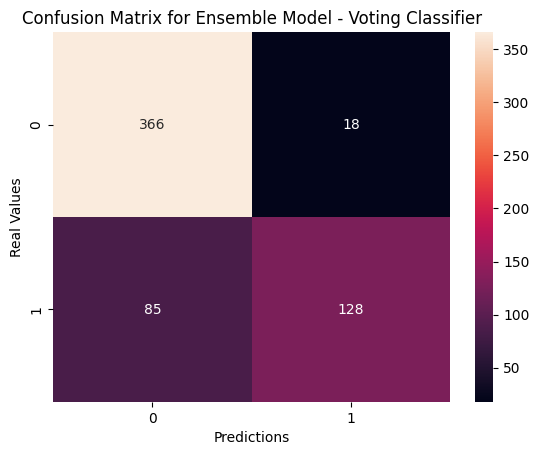

In [49]:
sns.heatmap(
    confusion_matrix(test_Y, y_pred), annot=True, fmt="2.0f"
).set_title("Confusion Matrix for Ensemble Model - Voting Classifier")
plt.xlabel("Predictions")
plt.ylabel("Real Values")

- Predictive ML model is right around 82 % of a time
- The number of correct predictions are 366 of Insurance Non-takers and 128 for Insurance Takers
- ML model wrongly classified 18 customers as Insurance takers and 85 as non-Takers. Thus it has made more mistakes by predicting COVID Insurance Non-takers than Takers.

## SUMMARY
- The analysis was performed on sample of Indian customers who was offered COVID Travel Insurance in 2019. The MAJORITY of customers are: quite wealthy, graduated, non-government workers without any chronic diseases, who in years 2017-2019 traveled by plane less than 4 times and have never been abroad
- Predictive Machine Learning Model for customers behavior (buying COVID Insurance) have been successfully created ensembling 3 most promising ML models (below) using Voting Classifier
- While testing classification ML models, the best were: Radial Support Vector Machine Model, k-nearest neighbors (KNN) and Random Forest. For modeling Standard Scalar have been used.
- The most important variable which have a significant impact on customer's behavior is Annual Income -  more wealthy customers tend to more often buy COVID Insurance (probably due to more costly holidays and trips they book)

## Further improvement 
Further improvement may focus on:
- More complex models and hyperparameter tuning eg. we can use XGBoost, LightGBM, CatBoost, and Neural Networks
- Other hyperparameter tuning techniques like Random Search,
- More advanced feature selection techniques like Recursive Feature Elimination, etc
- Other evaluation metrics like ROC-AUC, F1-Score, etc
- More advanced cross-validation techniques like Stratified K-Fold, etc